## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Nov 26 19:55:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.3/78.2 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9xn3vZS8YD9cpuvfh1L2")
project = rf.workspace("burobaslo").project("yolo8s_signs")
dataset = project.version(2).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to yolo8s_signs-2 in yolov8:: 100%|██████████| 1492/1492 [00:00<00:00, 4674.62it/s]


## Custom Training

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 batch=4 imgsz=640 plots=True exist_ok=True seed=0

/content
New https://pypi.org/project/ultralytics/8.0.218 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/yolo8s_signs-2/data.yaml, epochs=20, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=F

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					     P_curve.png	  train_batch1482.jpg
confusion_matrix_normalized.png			     PR_curve.png	  train_batch1.jpg
confusion_matrix.png				     predictions.json	  train_batch2.jpg
events.out.tfevents.1701024876.c02c9b2e22e3.3620.0   R_curve.png	  val_batch0_labels.jpg
events.out.tfevents.1701027583.c02c9b2e22e3.15716.0  results.csv	  val_batch0_pred.jpg
events.out.tfevents.1701027723.c02c9b2e22e3.16503.0  results.png	  val_batch1_labels.jpg
events.out.tfevents.1701028547.c02c9b2e22e3.20889.0  roboflow_deploy.zip  val_batch1_pred.jpg
F1_curve.png					     state_dict.pt	  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	  val_batch2_pred.jpg
labels.jpg					     train_batch1480.jpg  weights
model_artifacts.json				     train_batch1481.jpg


/content


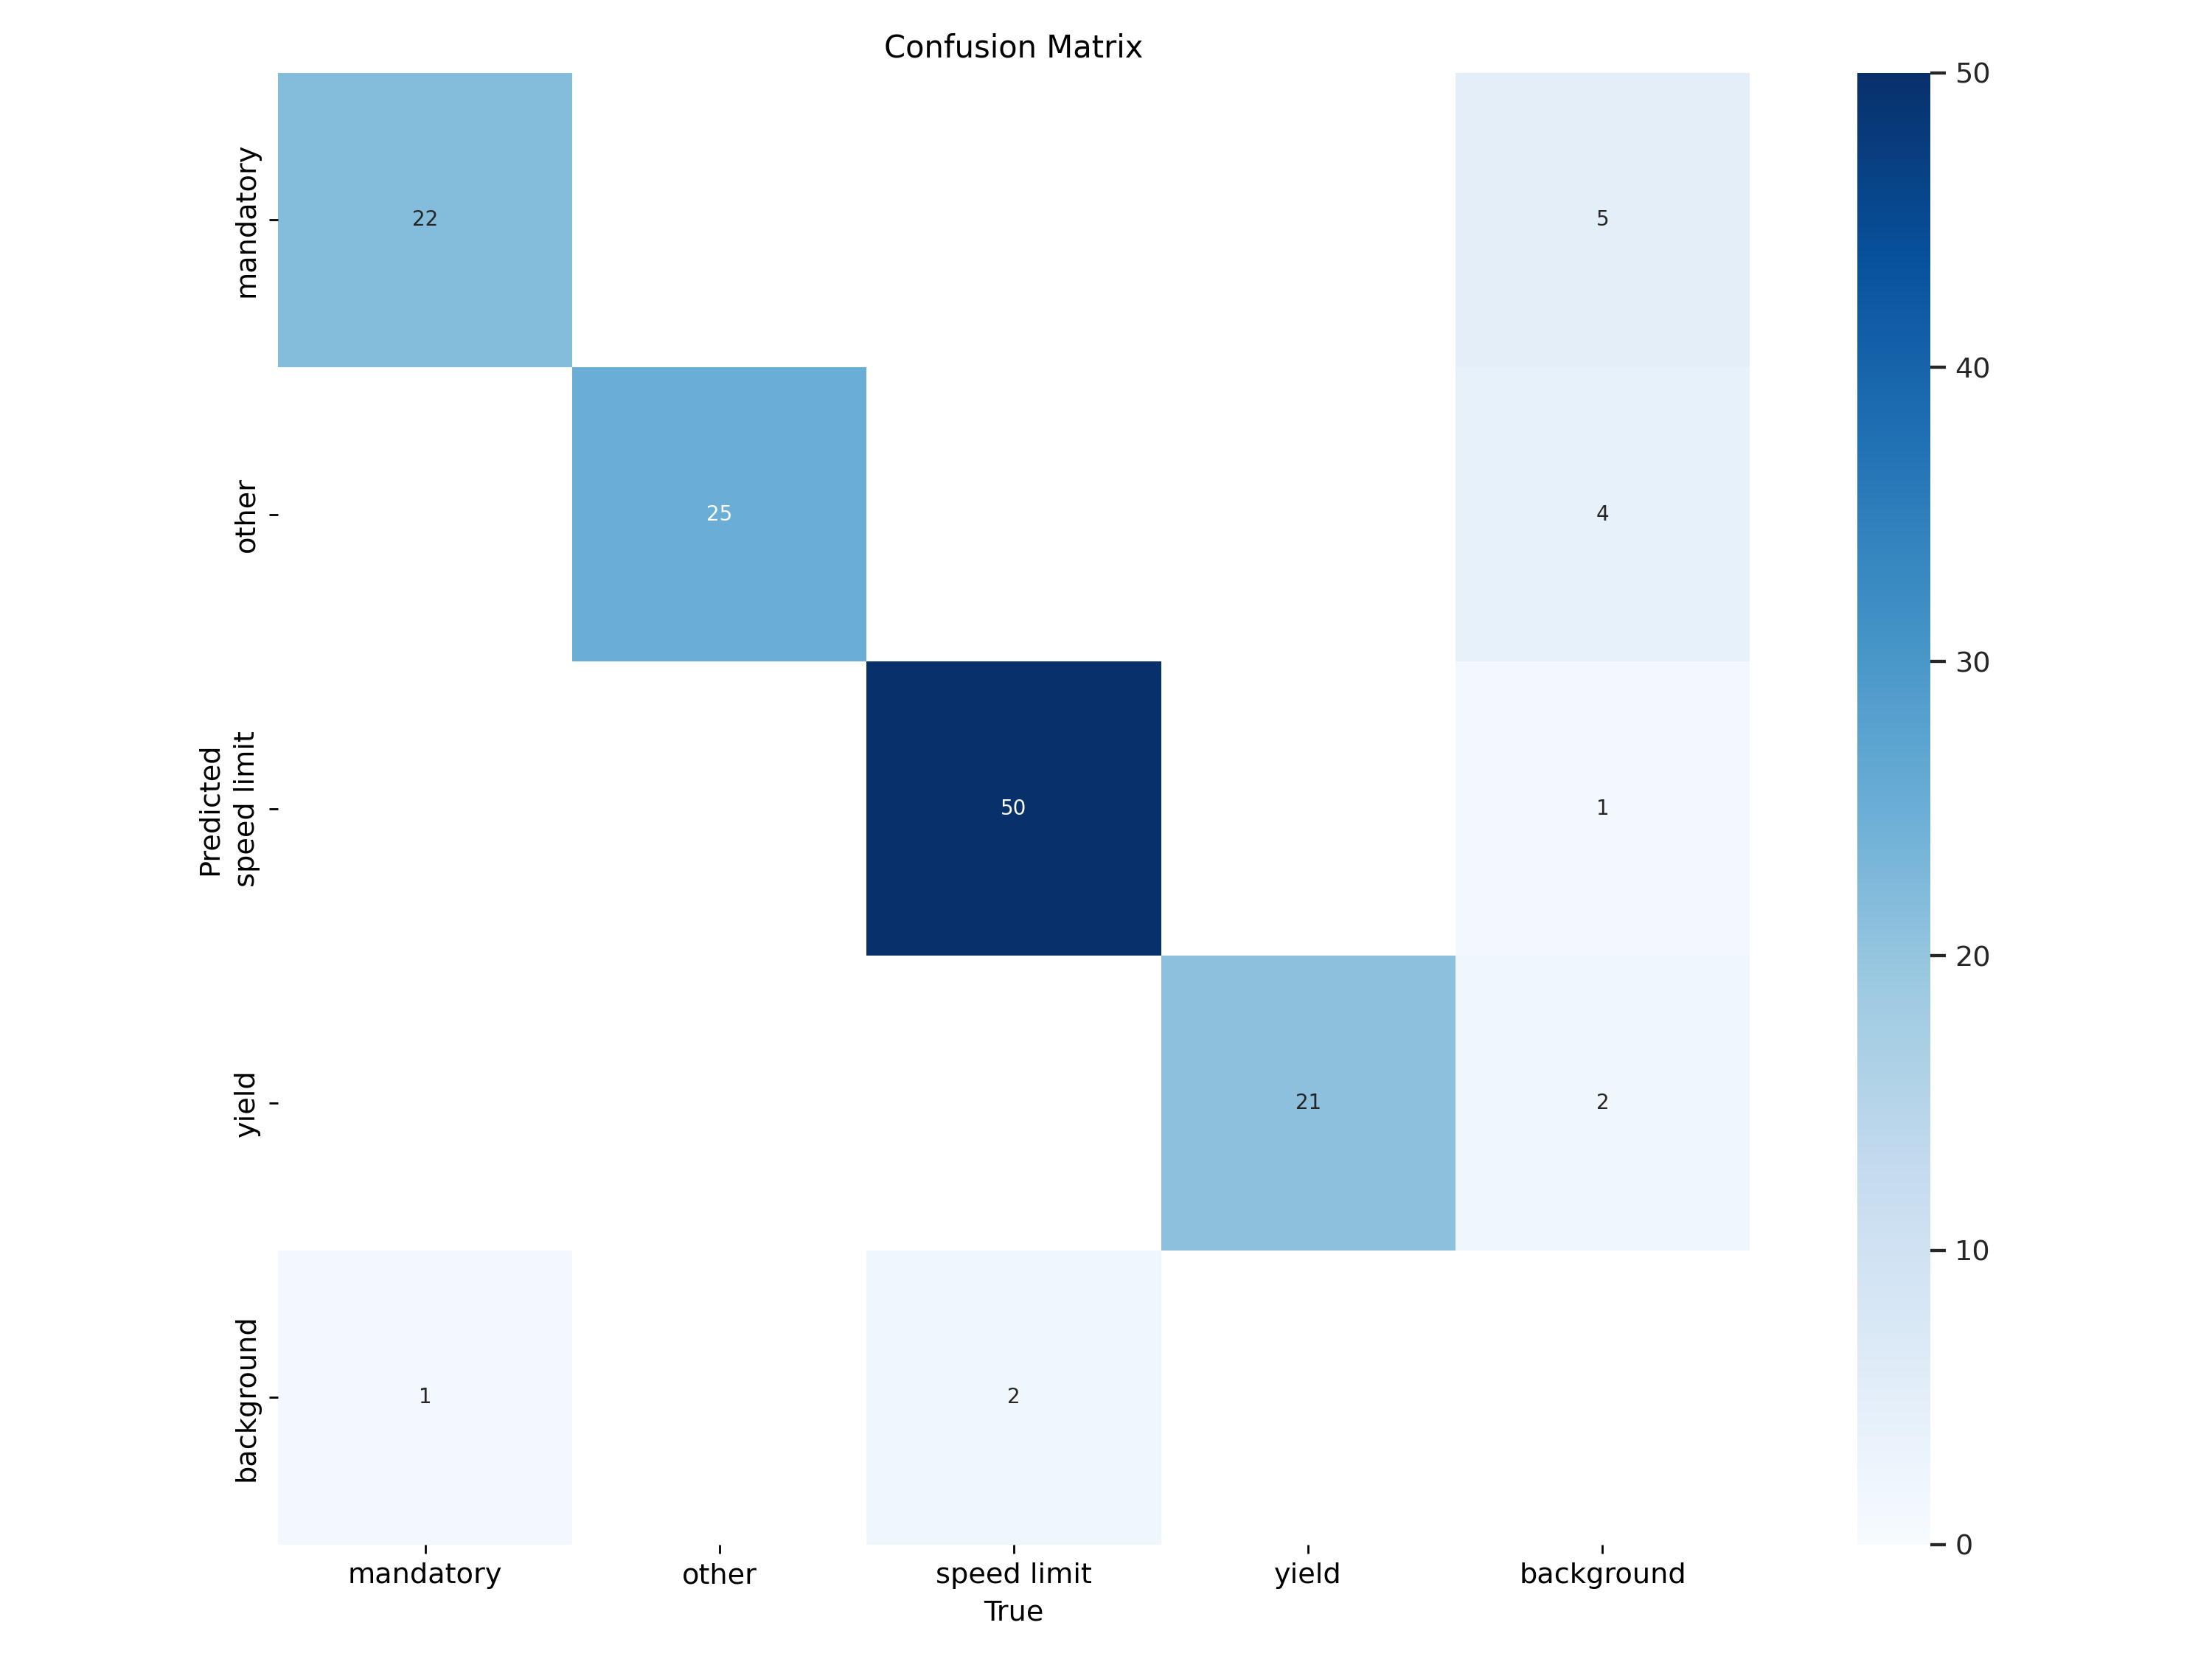

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


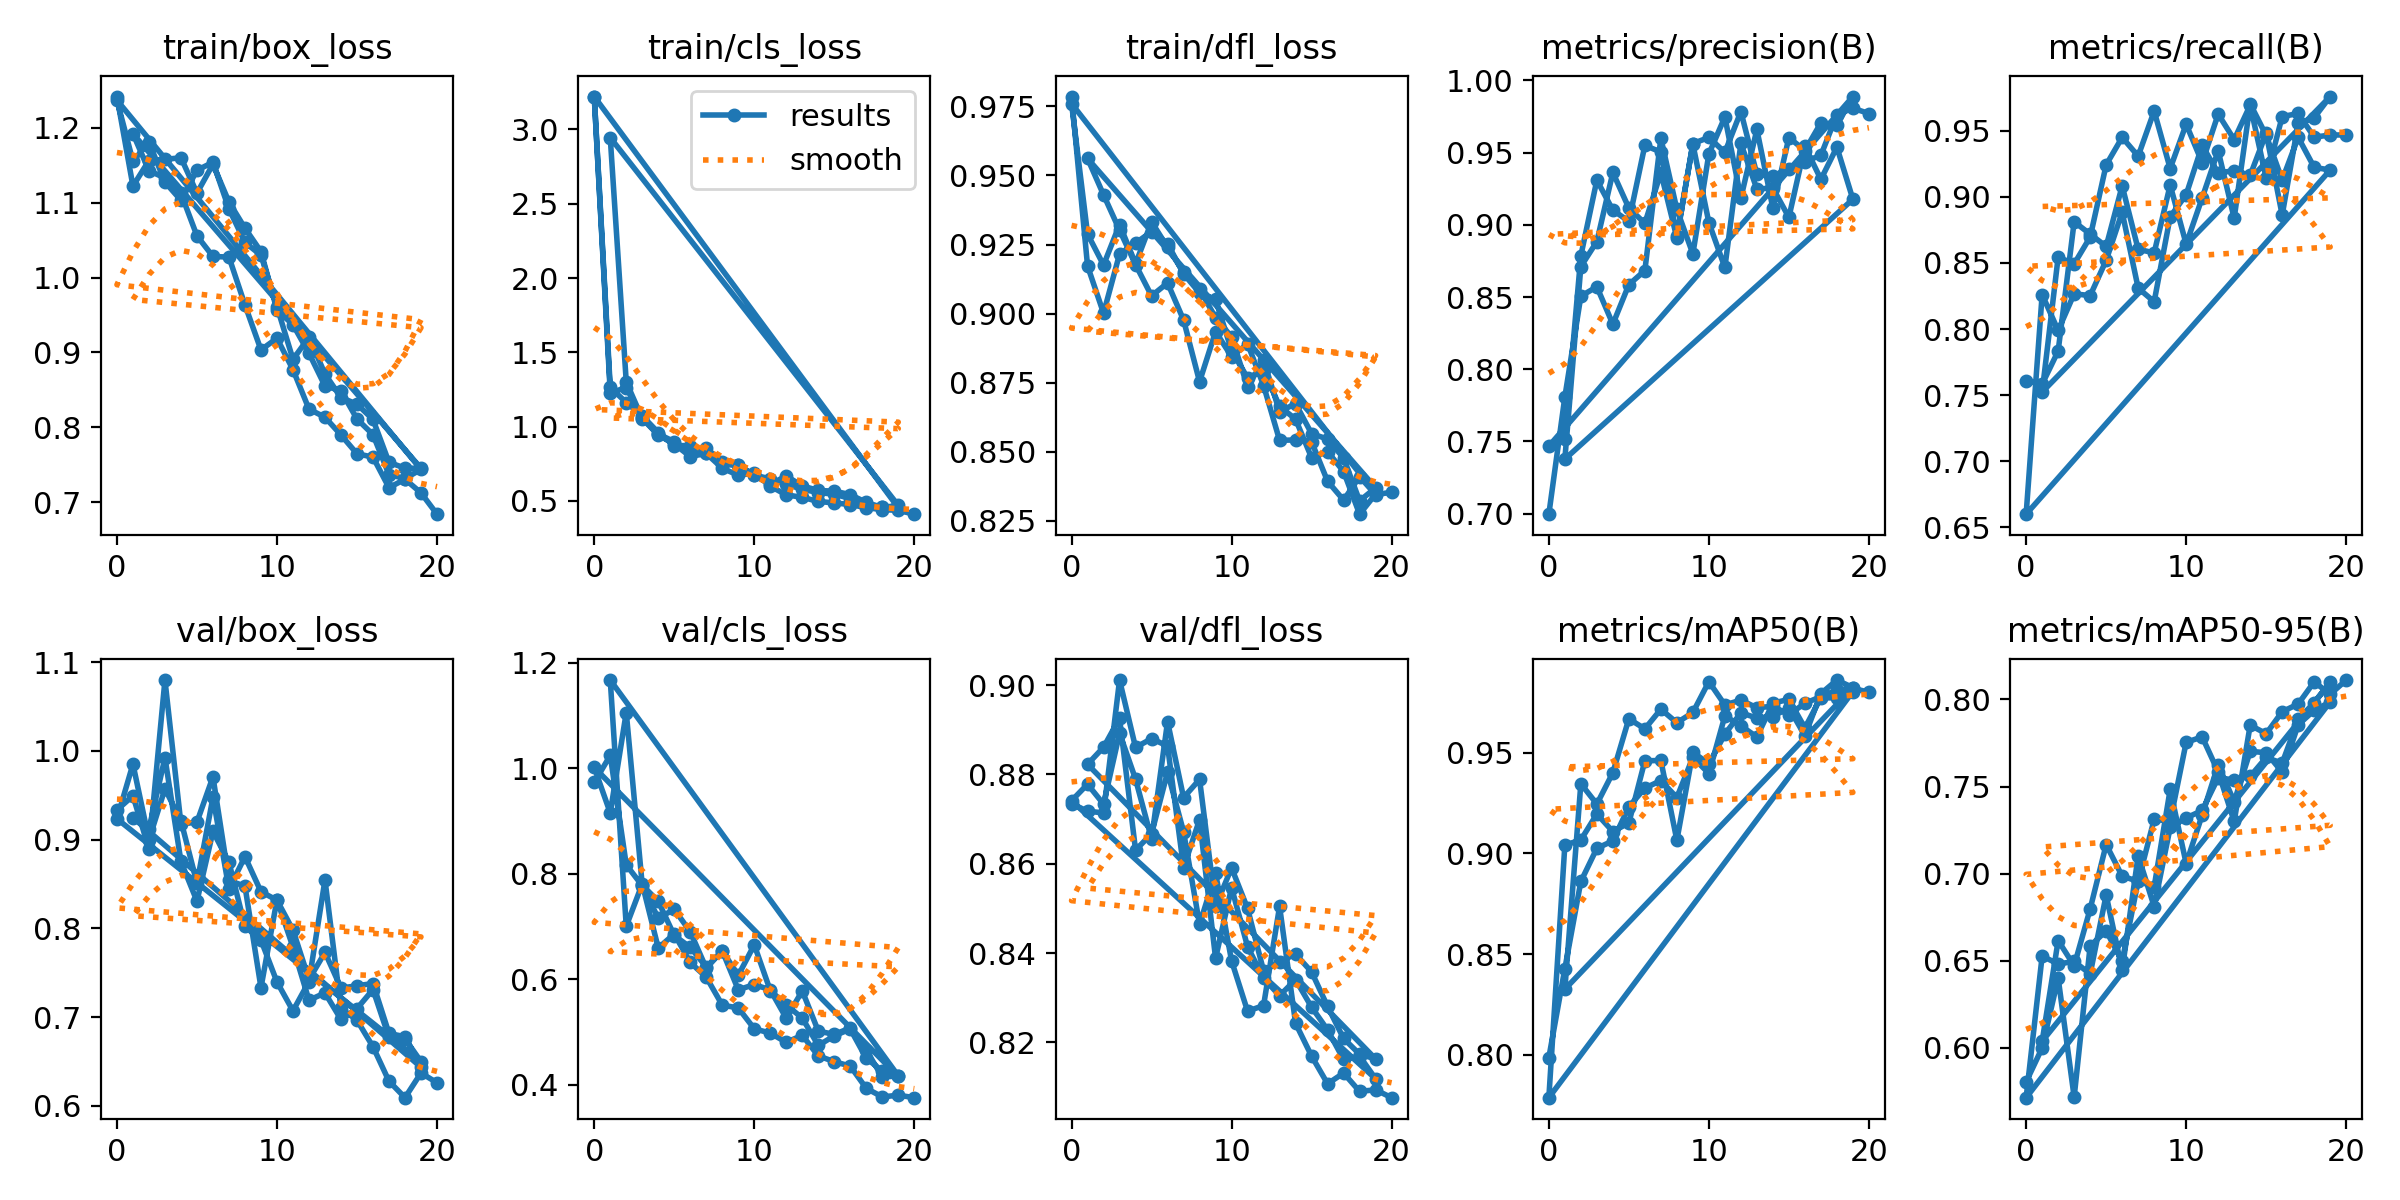

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


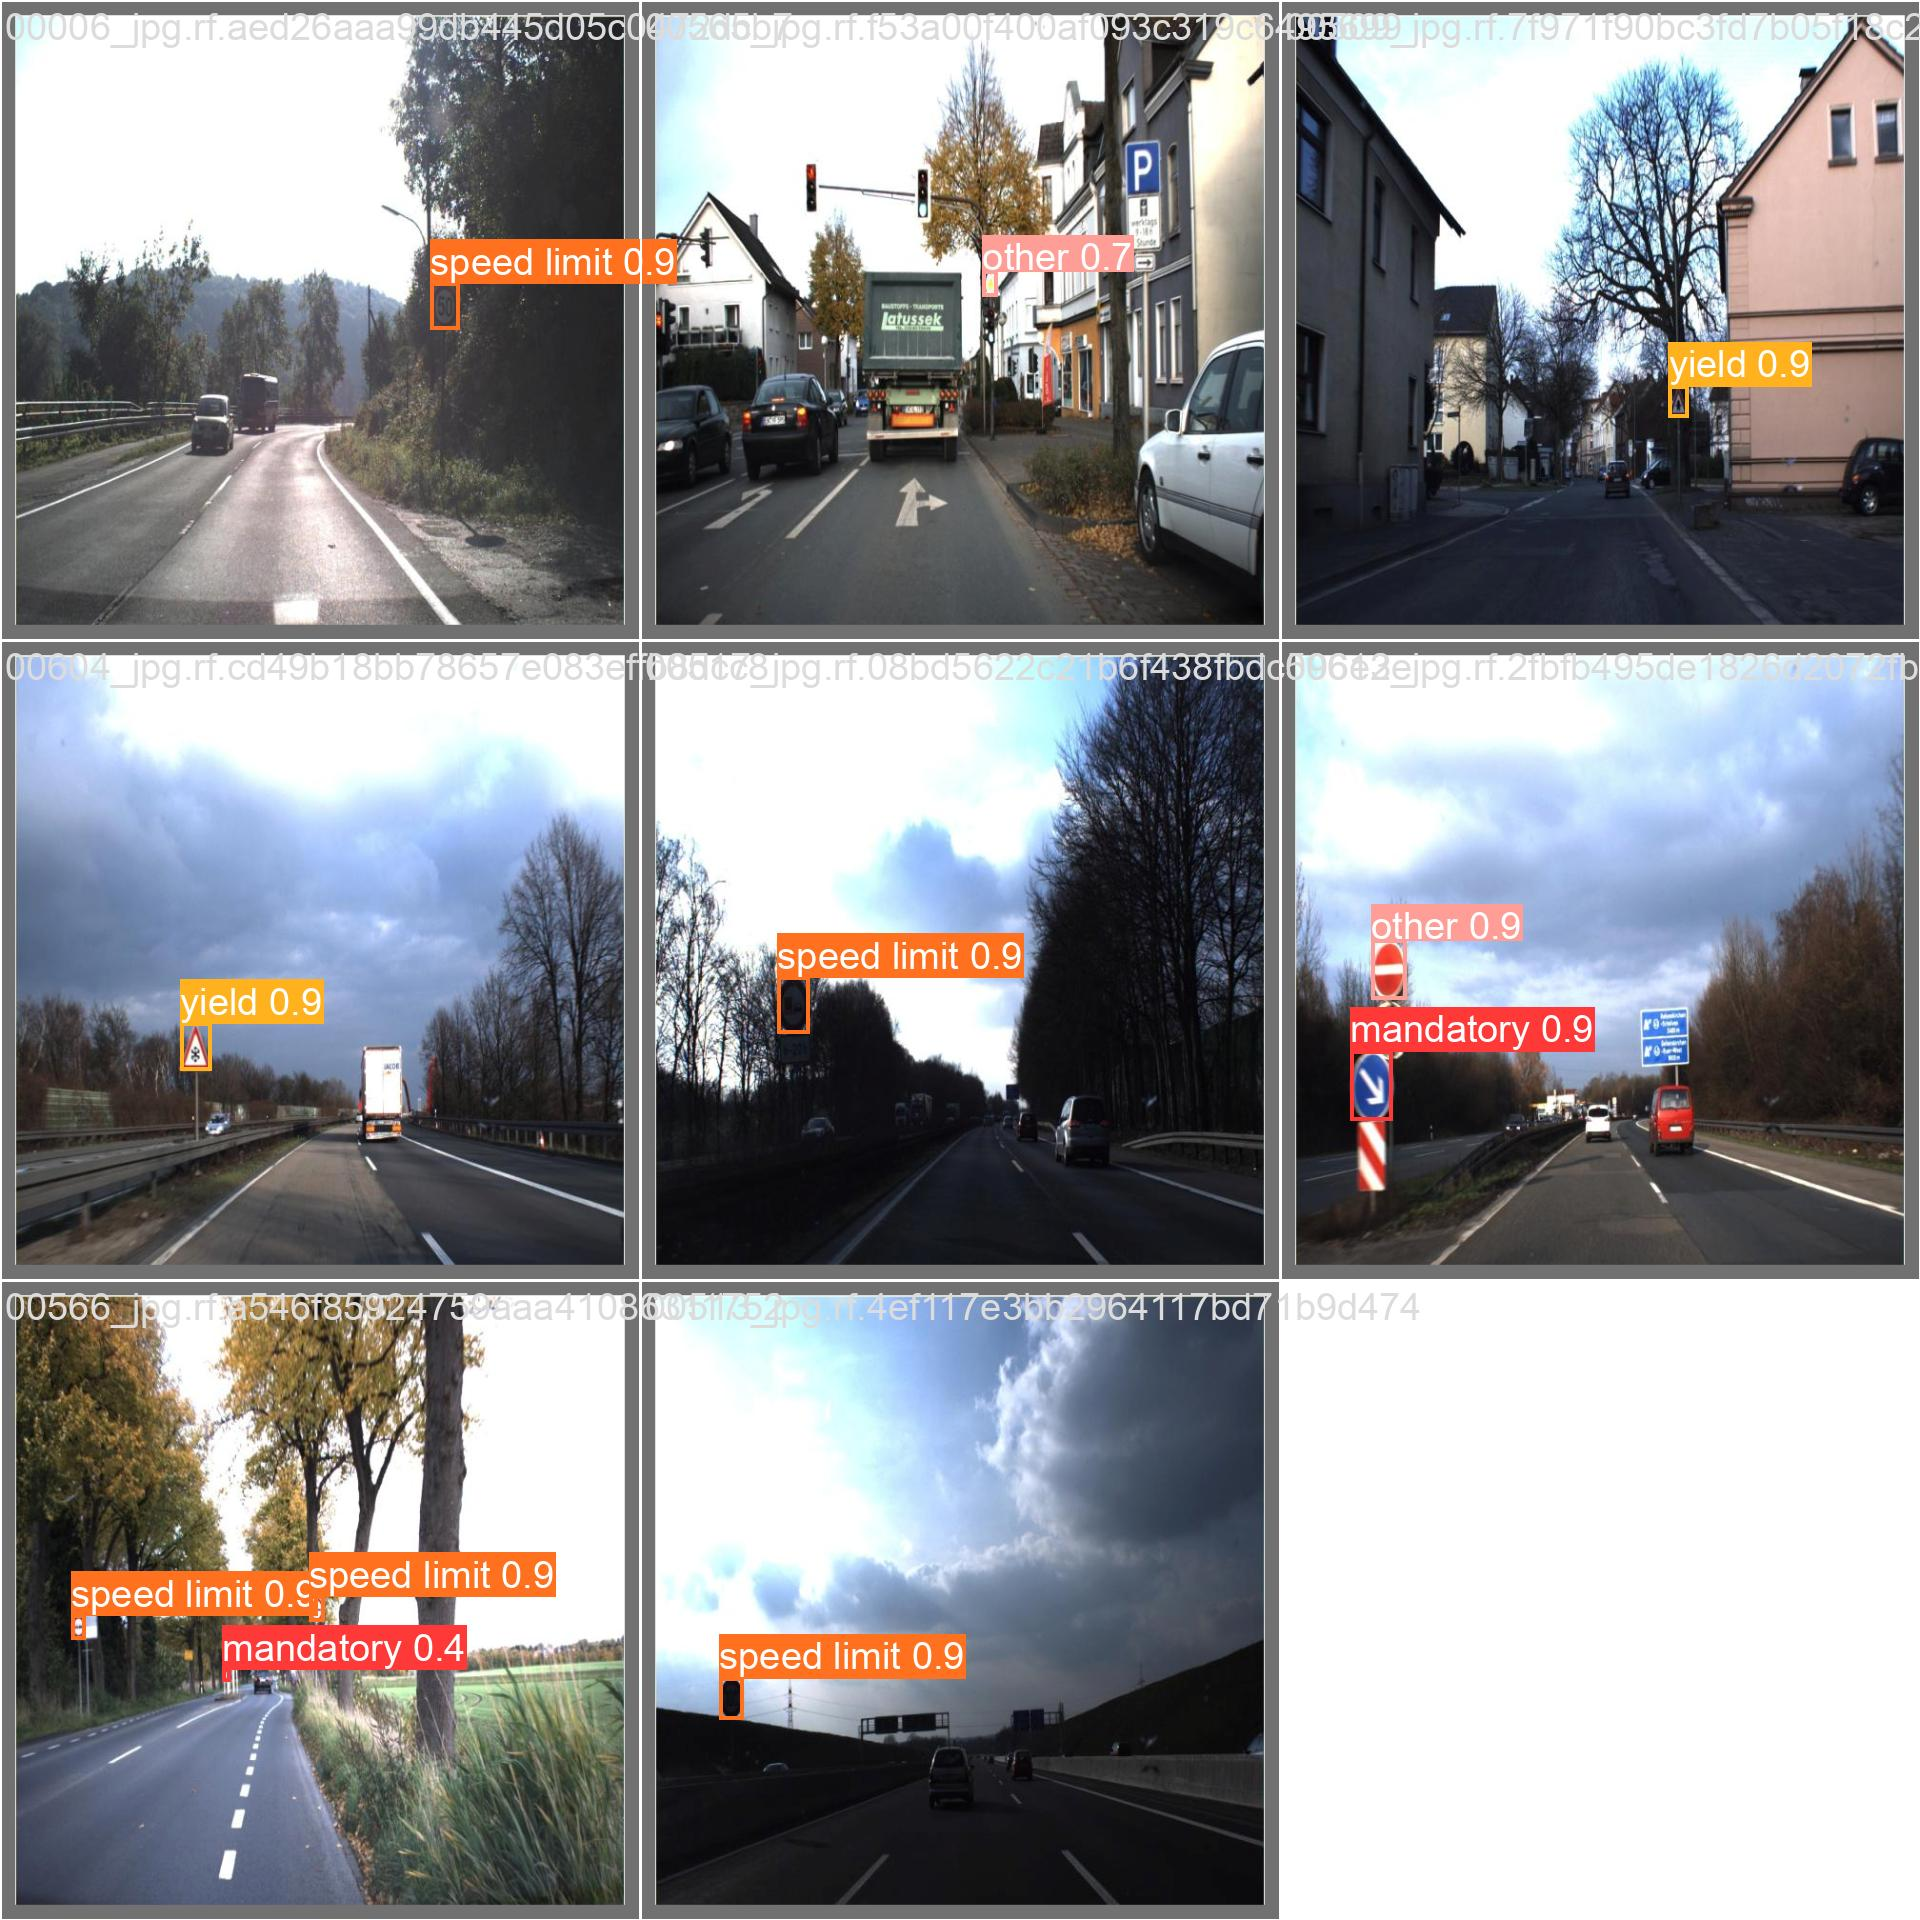

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/yolo8s_signs-2/valid/labels.cache... 74 images, 0 backgrounds, 0 corrupt: 100% 74/74 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:05<00:00,  1.04s/it]
                   all         74        121      0.977      0.947       0.98      0.813
             mandatory         74         23      0.962       0.87      0.969      0.809
                 other         74         25      0.956       0.96      0.973      0.786
           speed limit         74         52          1      0.958      0.983       0.84
                 yield         74         21      0.991          1      0.995      0.816
Speed: 11.3ms preprocess, 23.5ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/val4
💡

## Inference with Custom Model

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/74 /content/datasets/yolo8s_signs-2/test/images/00003_jpg.rf.1b4f46e2215c4c8b65f92d941dd2ac2e.jpg: 640x640 2 speed limits, 1 yield, 24.2ms
image 2/74 /content/datasets/yolo8s_signs-2/test/images/00017_jpg.rf.aa725235f1f34dad3df7f457dafea922.jpg: 640x640 1 yield, 16.3ms
image 3/74 /content/datasets/yolo8s_signs-2/test/images/00019_jpg.rf.fe8220ad22cece1a1540ed44544c06fc.jpg: 640x640 1 other, 1 speed limit, 16.3ms
image 4/74 /content/datasets/yolo8s_signs-2/test/images/00020_jpg.rf.a0069b265bd387b5a15b0ec5a8374d54.jpg: 640x640 1 yield, 16.3ms
image 5/74 /content/datasets/yolo8s_signs-2/test/images/00026_jpg.rf.213a4bc5c1eef980e67fec38023cab0c.jpg: 640x640 1 speed limit, 16.3ms
image 6/74 /content/datasets/yolo8s_signs-2/test/images/00029_jpg.rf.f84945b48113c1676d3f75d7d911082f.jpg: 640x640 1 speed limit,

**NOTE:** Let's take a look at few results.

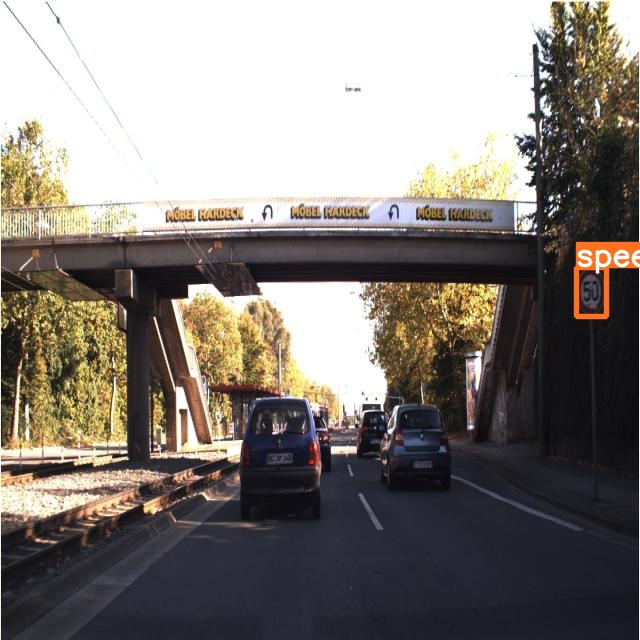

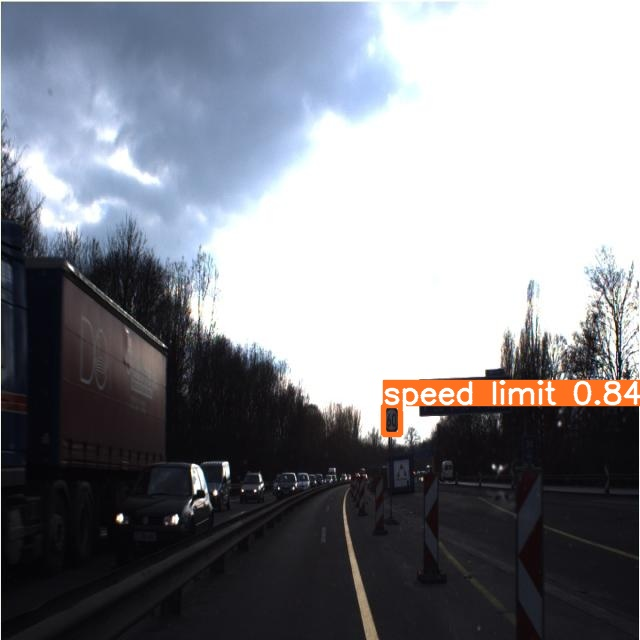

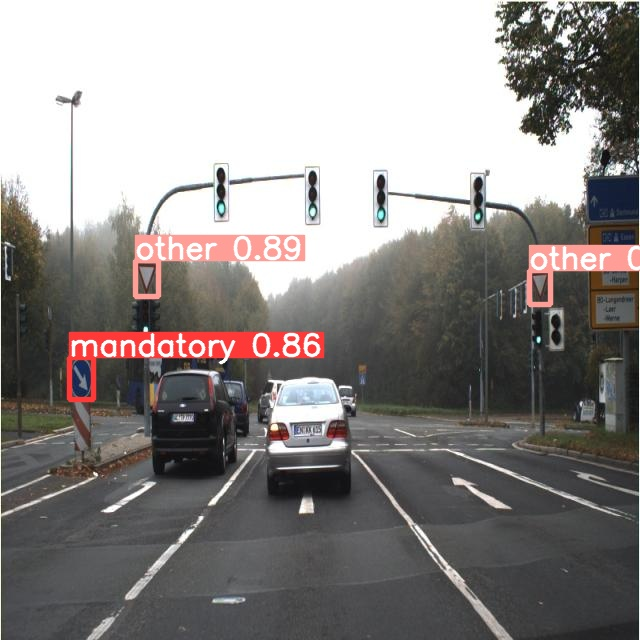

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [15]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
